In [7]:
from sqlalchemy import create_engine
from sqlalchemy import Table, Column, Integer, String, MetaData
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [20]:
SERVER='LAPTOP-6GFL9EFK'
DATABASE='QUAN_LY_LOP_HOC'
DRIVER='ODBC Driver 17 for SQL Server'
USERNAME=''
PASSWORD=''
DATABASE_CONNECTION=f'mssql://{USERNAME}:{PASSWORD}@{SERVER}/{DATABASE}?driver={DRIVER}'

In [21]:
engine = create_engine(DATABASE_CONNECTION)
connection = engine.connect()

In [27]:
data = pd.read_sql_query("SELECT *\
                        FROM [QUAN_LY_LOP_HOC].[dbo].[LOP_HOC] ", connection)
data

,MA_LOP_HOC,TEN_LOP_HOC,GHI_CHU,SO_LUONG_HOC_VIEN
0,004,A3,,30
1,005,A2,,24
2,006,A7,,31
3,006,A7,,31
4,005,A2,,24
5,004,A3,,30


In [26]:
data1 = pd.read_sql_query("SELECT *\
                            FROM [HON_HOP].[dbo].[NBA]", connection)
data1

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,2022-06-02,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,2022-06-06,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,2022-06-05,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,2022-06-05,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,2022-06-10,231.0,None,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,2022-06-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,2022-06-03,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,2022-06-01,179.0,None,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,2022-07-03,256.0,None,2900000.0


In [6]:
data.dtypes

MA_LOP_HOC           object
TEN_LOP_HOC          object
GHI_CHU              object
SO_LUONG_HOC_VIEN     int64
dtype: object

<AxesSubplot:xlabel='TEN_LOP_HOC', ylabel='SO_LUONG_HOC_VIEN'>

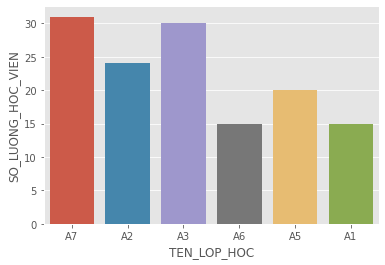

In [20]:
sns.barplot(data=data,x='TEN_LOP_HOC',y='SO_LUONG_HOC_VIEN')

In [21]:
dia_chi='D:/Test/'
data.to_csv(dia_chi+'vmt.csv',index=True)

In [24]:
data

,MA_LOP_HOC,TEN_LOP_HOC,GHI_CHU,SO_LUONG_HOC_VIEN
0,006,A7,,31
1,005,A2,,24
2,004,A3,,30
3,003,A6,,15
4,002,A5,,20
5,001,A1,,15


In [23]:
pd.read_csv(dia_chi+'vmt.csv')

,Unnamed: 0,MA_LOP_HOC,TEN_LOP_HOC,GHI_CHU,SO_LUONG_HOC_VIEN
0,0,6,A7,NaN,31
1,1,5,A2,NaN,24
2,2,4,A3,NaN,30
3,3,3,A6,NaN,15
4,4,2,A5,NaN,20
5,5,1,A1,NaN,15


In [25]:
data.to_sql('LOP_HOC', con=engine, if_exists='append', index=False, chunksize=50)

In [26]:
data

,MA_LOP_HOC,TEN_LOP_HOC,GHI_CHU,SO_LUONG_HOC_VIEN
0,006,A7,,31
1,005,A2,,24
2,004,A3,,30
3,003,A6,,15
4,002,A5,,20
5,001,A1,,15


In [8]:
data1 = pd.read_sql_query("SELECT *\
                          FROM [HON_HOP].[dbo].[NBA] \
                           \
                           "
                          , connection)
data1

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,2022-06-02,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,2022-06-06,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,2022-06-05,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,2022-06-05,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,2022-06-10,231.0,None,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,2022-06-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,2022-06-03,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,2022-06-01,179.0,None,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,2022-07-03,256.0,None,2900000.0


In [77]:
datanew=data1.drop(['College','Height'],axis=1).dropna()
datanew

,Name,Team,Number,Position,Age,Weight,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,180.0,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,235.0,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,185.0,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,231.0,5000000.0
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,240.0,12000000.0
...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,234.0,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,203.0,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,179.0,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,256.0,2900000.0


In [87]:
columnsTitles = ['Name', 'Team', 'Number','Position','Age','Weight','Salary']

frame = datanew.reindex(columns=columnsTitles)
frame

,Name,Team,Number,Position,Age,Weight,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,180.0,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,235.0,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,185.0,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,231.0,5000000.0
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,240.0,12000000.0
...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,234.0,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,203.0,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,179.0,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,256.0,2900000.0


<AxesSubplot:xlabel='Age', ylabel='Density'>

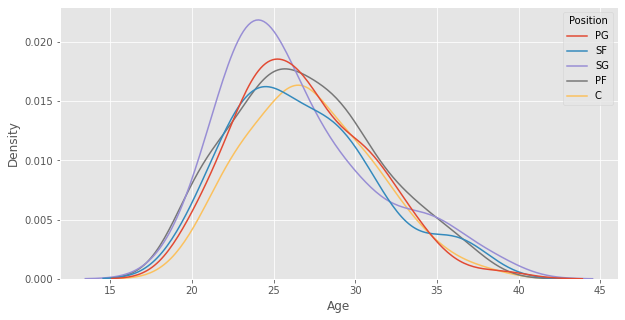

In [52]:
plt.figure(figsize=(10,5))
palette_dict={x:'gray' for x in datanew.Position.unique()}
palette_dict['C']='crimson'
sns.kdeplot(data=datanew,x='Age',hue='Position')

<AxesSubplot:xlabel='Position', ylabel='Age'>

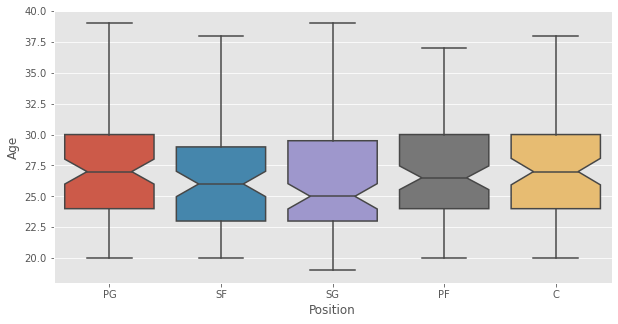

In [51]:
plt.figure(figsize=(10,5))
sns.boxplot(data=datanew,x='Position',y='Age',notch=True)

In [50]:
datanew.drop(datanew[datanew.Age>=40].index,inplace=True)

In [58]:
datanew.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Weight      float64
Salary      float64
Id            int64
dtype: object

In [94]:
SERVER='LAPTOP-6GFL9EFK'
DATABASE='HON_HOP'
DRIVER='ODBC Driver 17 for SQL Server'
USERNAME=''
PASSWORD=''
DATABASE_CONNECTION=f'mssql://{USERNAME}:{PASSWORD}@{SERVER}/{DATABASE}?driver={DRIVER}'

In [85]:
engine = create_engine(DATABASE_CONNECTION, echo = True)
meta=MetaData()
tuyenthu = Table(
   'tuyenthu', meta, 
   Column('Name', String), 
   Column('Team', String), 
   Column('Number', Integer), 
   Column('Position', String), 
   Column('Age', Integer), 
   Column('Weight', Integer), 
   Column('Salary', Integer)
)
meta.create_all(engine)

2022-02-26 01:11:59,285 INFO sqlalchemy.engine.Engine SELECT CAST(SERVERPROPERTY('ProductVersion') AS VARCHAR)
2022-02-26 01:11:59,285 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-02-26 01:11:59,287 INFO sqlalchemy.engine.Engine SELECT schema_name()
2022-02-26 01:11:59,288 INFO sqlalchemy.engine.Engine [generated in 0.00063s] ()
2022-02-26 01:11:59,292 INFO sqlalchemy.engine.Engine SELECT CAST('test max support' AS NVARCHAR(max))
2022-02-26 01:11:59,292 INFO sqlalchemy.engine.Engine [generated in 0.00065s] ()
2022-02-26 01:11:59,294 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-02-26 01:11:59,299 INFO sqlalchemy.engine.Engine SELECT [INFORMATION_SCHEMA].[TABLES].[TABLE_NAME] 
FROM [INFORMATION_SCHEMA].[TABLES] 
WHERE [INFORMATION_SCHEMA].[TABLES].[TABLE_TYPE] = CAST(? AS NVARCHAR(max)) AND [INFORMATION_SCHEMA].[TABLES].[TABLE_NAME] = CAST(? AS NVARCHAR(max)) AND [INFORMATION_SCHEMA].[TABLES].[TABLE_SCHEMA] = CAST(? AS NVARCHAR(max))
2022-02-26 01:11:59,300 INFO sqlalchemy.engi